In [42]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from pmdarima.arima import AutoARIMA

In [43]:

# Cargar los datos desde el archivo TIIE28.xls
datos = pd.read_excel("TIIE28.xls")
datos.tail(5)


,Date,TIIE28,T
518,2023/03,101.577865,2023/03
519,2023/04,101.589776,2023/04
520,2023/05,101.569448,2023/05
521,2023/06,101.525575,2023/06
522,2023/07,101.467534,2023/07


In [44]:
# Convertir la columna 'Date' a formato de fecha
datos['Date'] = pd.to_datetime(datos['Date'], format="%Y/%m")

# Establecer la columna 'Date' como índice
datos.set_index('Date', inplace=True)

# Eliminar la columna 'T'
datos.drop('T', axis=1, inplace=True)

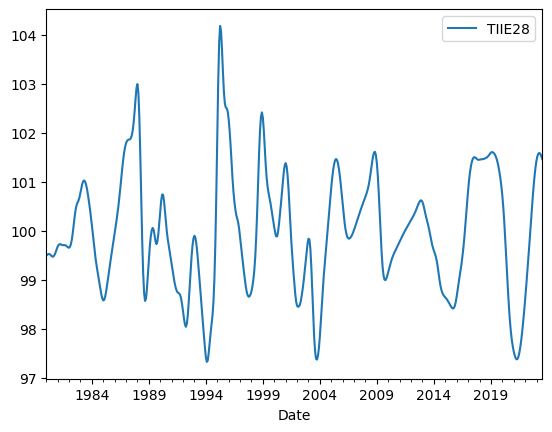

In [45]:
datos.plot()
plt.show()

In [46]:
datos.isnull().value_counts()

TIIE28
False     523
Name: count, dtype: int64

In [47]:
#Testing for stationarity
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(datos)

(0.01, False)

In [48]:

arima_model =  auto_arima(datos['TIIE28'], trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50, seasonal=True, m=12 )

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-2659.867, Time=2.98 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1721.693, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-176.407, Time=0.65 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=6303.245, Time=0.03 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=-2661.524, Time=2.29 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=-2663.240, Time=0.41 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=-2661.615, Time=1.78 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(3,0,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,0,3)(0,0,0)[12] intercept   : AIC=-2994.777, Time=0.33 sec
 ARIMA(2,0,3)(1,0,0)[12] intercept   : AIC=-2986.581, Time=2.19 sec
 ARIMA(2,0,3)(0,0,1)[12] intercept   : AIC=-2992.837, Time=2.81 sec
 ARIMA(2,0,3)(1,0,1)[12] interce

In [49]:
AutoARIMA()

arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  523
Model:               SARIMAX(4, 0, 4)   Log Likelihood                1685.631
Date:                Sun, 12 Nov 2023   AIC                          -3351.262
Time:                        13:01:08   BIC                          -3308.666
Sample:                    01-01-1980   HQIC                         -3334.579
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4376      0.077      5.654      0.000       0.286       0.589
ar.L1          3.3798      0.056     60.212      0.000       3.270       3.490
ar.L2         -4.4809      0.149    -30.093      0.000      -4.773      -4.189
ar.L3          2.7831      0.137     20.286      0.000       2.514       3.052
ar.L4         -0.6863      0.044    -15.501      0.000      -0.773      -0.600
ma.L1          1.0525      0.064     16.460      0.000       0.927       1.178
ma.L2          0.3380      0.115      2.942      0.003       0.113       0.563
ma.L3         -0.1108      0.101     -1.102      0.270      -0.308       0.086
ma.L4         -0.1010      0.049     -2.061      0.039      -0.197      -0.005
sigma2      8.895e-05   3.91e-06     22.728      0.000    8.13e-05    9.66e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               276.40
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
# Hacer predicciones para agosto y septiembre de 2023
predicciones, conf_int = arima_model.predict(n_periods=4, return_conf_int=True)

# Crear un DataFrame con las fechas de pronóstico
fechas_pronostico = pd.date_range(start='2023-08-01', periods=4, freq='M')

# Crear un DataFrame con las predicciones y las fechas correspondientes
pronostico_df = pd.DataFrame({'Fecha': fechas_pronostico, 'Pronostico': predicciones})


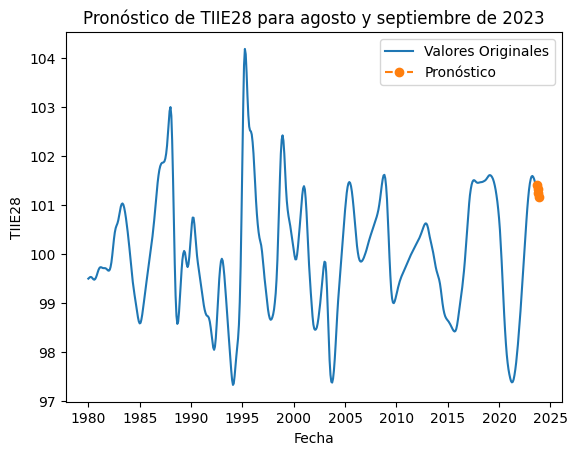

In [54]:
# Plotear los valores originales
plt.plot(datos.index, datos['TIIE28'], label='Valores Originales')

# Plotear las predicciones
plt.plot(pronostico_df['Fecha'], pronostico_df['Pronostico'], label='Pronóstico', linestyle='dashed', marker='o')

# Añadir leyendas y etiquetas
plt.legend()
plt.title('Pronóstico de TIIE28 para agosto y septiembre de 2023')
plt.xlabel('Fecha')
plt.ylabel('TIIE28')

# Mostrar el gráfico
plt.show()

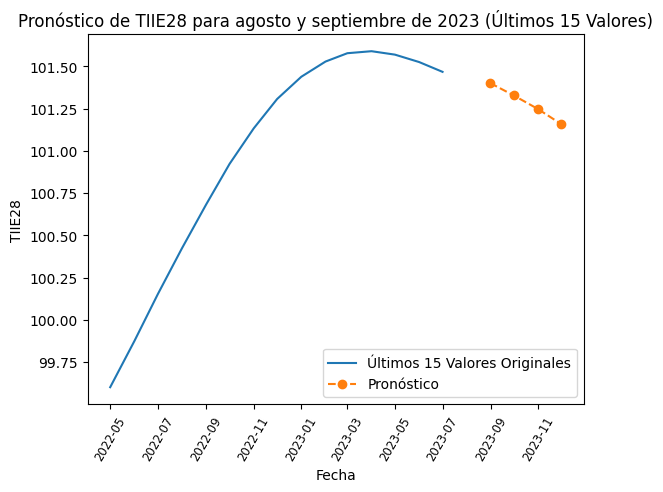

In [57]:
# Plotear solo los últimos 15 valores originales
ultimos_valores_originales = datos.iloc[-15:]
plt.plot(ultimos_valores_originales.index, ultimos_valores_originales['TIIE28'], label='Últimos 15 Valores Originales')

# Plotear las predicciones
plt.plot(pronostico_df['Fecha'], pronostico_df['Pronostico'], label='Pronóstico', linestyle='dashed', marker='o')

# Añadir leyendas y etiquetas
plt.legend()
plt.title('Pronóstico de TIIE28 para agosto y septiembre de 2023 (Últimos 15 Valores)')
plt.xlabel('Fecha')
plt.xticks(rotation=60, fontsize='small')
plt.ylabel('TIIE28')

# Mostrar el gráfico
plt.show()

In [12]:
# Ajustar el modelo ARIMA automáticamente
modelo = auto_arima(datos['TIIE28'], seasonal=True, m=12)

# Pronosticar para agosto y septiembre (2 periodos hacia adelante)
pronostico, conf_int = modelo.predict(n_periods=2, return_conf_int=True)

# Crear un DataFrame para mostrar los resultados
resultados = pd.DataFrame({'Fecha': pd.date_range(start=datos.index[-1] + pd.DateOffset(months=1), periods=2, freq='M'),
                            'Pronostico': pronostico,
                            'Intervalo de Confianza Inferior': conf_int[:, 0],
                            'Intervalo de Confianza Superior': conf_int[:, 1]})

print(resultados)

                Fecha  Pronostico  Intervalo de Confianza Inferior   
2023-08-01 2023-08-31  101.401306                       101.382820  \
2023-09-01 2023-09-30  101.328632                       101.244642   

            Intervalo de Confianza Superior  
2023-08-01                       101.419791  
2023-09-01                       101.412622  
